In [2]:
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
def values_to_colors(ser:pd.Series):
    """Helper function for mapping a categorical variable to colors for matplotlib."""
    color_labels = ser.unique()
    rgb_values = sns.color_palette("colorblind", 8)
    color_map = dict(zip(color_labels, rgb_values))
    return ser.map(color_map)

In [11]:
task_names = {
    "acsfoodstamps_st": "ACS Food Stamps (State)",
    "acsfoodstamps_year": "ACS Food Stamps (Year)",
    "acsincome_st": "ACS Income (State)",
    "acsincome_year": "ACS Income (Year)",
    "acspubcov_st": "ACS Public Coverage (State)",
    "acspubcov_year": "ACS Public Coverage (Year)",
    "acsunemployment_st": "ACS Unemployment (State)",
    "acsunemployment_year": "ACS Unemployment (Year)",
    "anes_st": "ANES (State)",
    "anes_year": "ANES (Year)",
    "brfss_st": "BRFSS (State)",
    "candc_st": "Comm. and Crime (State)",
    "diabetes_admsrc": "Diabetic Readmission (Src.)",
    "diabetes_admtype": "Diabetic Readmission (Type)",
    "mooc_course": "MOOC (Course)",
    "nhanes_year": "NHANES (Year)",
    "physionet_set": "Physionet (Hospital)",
}

dfs = []
for task, name in task_names.items():
    
    f = glob.glob(f"./results-{task}*.csv")[0]
    print(f)
    df = pd.read_csv(f, index_col=0).rename(columns={'domain_split_odd_values':'domain_split_ood_values'})
    df["dataset"] = name
    dfs.append(df)

df = pd.concat(dfs)
del dfs

df['estimator'] = df['estimator'].map({
    "<class 'sklearn.linear_model._logistic.LogisticRegressionCV'>": "L2LR",
    "<class 'sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier'>": "HistGB",
       "<class 'xgboost.sklearn.XGBClassifier'>": "XGBoost",
})
df.head()

./results-acsfoodstamps_st-2022-11-1100:41:44.676330.csv
./results-acsfoodstamps_year-2022-11-1105:14:39.645716.csv
./results-acsincome_st-2022-10-2115:10:01.805689.csv
./results-acsincome_year-2022-11-0807:23:40.628322.csv
./results-acspubcov_st-2022-10-2113:08:24.893051.csv
./results-acspubcov_year-2022-11-0806:42:00.538518.csv
./results-acsunemployment_st-2022-11-1107:15:07.073470.csv
./results-acsunemployment_year-2022-11-1100:58:25.124009.csv
./results-anes_st-2022-11-0216:51:56.135975.csv
./results-anes_year-2022-11-0220:44:07.129211.csv
./results-brfss_st-2022-10-2814:30:10.421081.csv
./results-candc_st-2022-10-3117:36:56.378076.csv
./results-diabetes_admsrc-2022-11-0101:59:28.352929.csv
./results-diabetes_admtype-2022-11-0100:58:32.079509.csv
./results-mooc_course-2022-10-3112:42:31.483340.csv
./results-nhanes_year-2022-11-0804:26:55.859909.csv
./results-physionet_set-2022-10-3022:06:56.440842.csv


,estimator,task,domain_split_varname,domain_split_ood_values,accuracy_id_test,selection_rate_id_test,count_id_test,tpr_id_test,fpr_id_test,auc_id_test,...,Age0Gender1cvar_ood_test,Age0Gender1loss_variance_ood_test,Age1Gender0crossentropy_ood_test,Age1Gender0cvar_doro_ood_test,Age1Gender0cvar_ood_test,Age1Gender0loss_variance_ood_test,Age1Gender1crossentropy_ood_test,Age1Gender1cvar_doro_ood_test,Age1Gender1cvar_ood_test,Age1Gender1loss_variance_ood_test
0,L2LR,acsfoodstamps,ST,AL,0.816075,0.101738,2762.0,0.308600,0.045182,0.631709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HistGB,acsfoodstamps,ST,AL,0.857712,0.139754,2762.0,0.494098,0.042877,0.725610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,XGBoost,acsfoodstamps,ST,AL,0.885952,0.155684,2762.0,0.596965,0.035039,0.780963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,L2LR,acsfoodstamps,ST,AK,0.823009,0.176991,339.0,0.500000,0.056680,0.721660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HistGB,acsfoodstamps,ST,AK,0.938053,0.227139,339.0,0.804348,0.012146,0.896101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
def chunker(chunk_size, my_list):
    return [my_list[i:i + chunk_size] for i in range(0, len(my_list), chunk_size)]

dataset is ACS Food Stamps (State), xymin is 0.5953878406708596
dataset is ACS Food Stamps (Year), xymin is 0.751875699888018
dataset is ACS Income (State), xymin is 0.696584058941728
dataset is ACS Income (Year), xymin is 0.7815475590203635
dataset is ACS Public Coverage (State), xymin is 0.588495575221239
dataset is ACS Public Coverage (Year), xymin is 0.7194728647686833
dataset is ACS Unemployment (State), xymin is 0.8849162011173184
dataset is ACS Unemployment (Year), xymin is 0.9494962015901968
dataset is ANES (State), xymin is 0.7982832618025751
dataset is ANES (Year), xymin is 0.4761904761904761
dataset is BRFSS (State), xymin is 0.7115384615384616
dataset is Comm. and Crime (State), xymin is 0.6904761904761905
dataset is Diabetic Readmission (Src.), xymin is 0.6038602941176471
dataset is Diabetic Readmission (Type), xymin is 0.6048550236008091
dataset is MOOC (Course), xymin is 0.9700896231508476
dataset is NHANES (Year), xymin is 0.9090084643288996
dataset is Physionet (Hospit

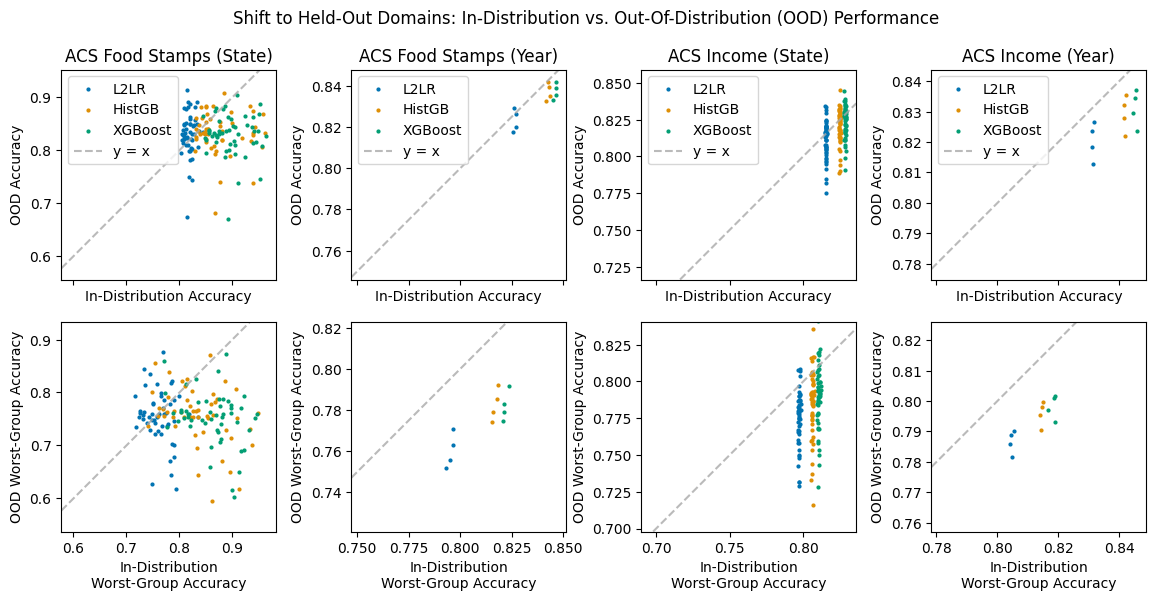

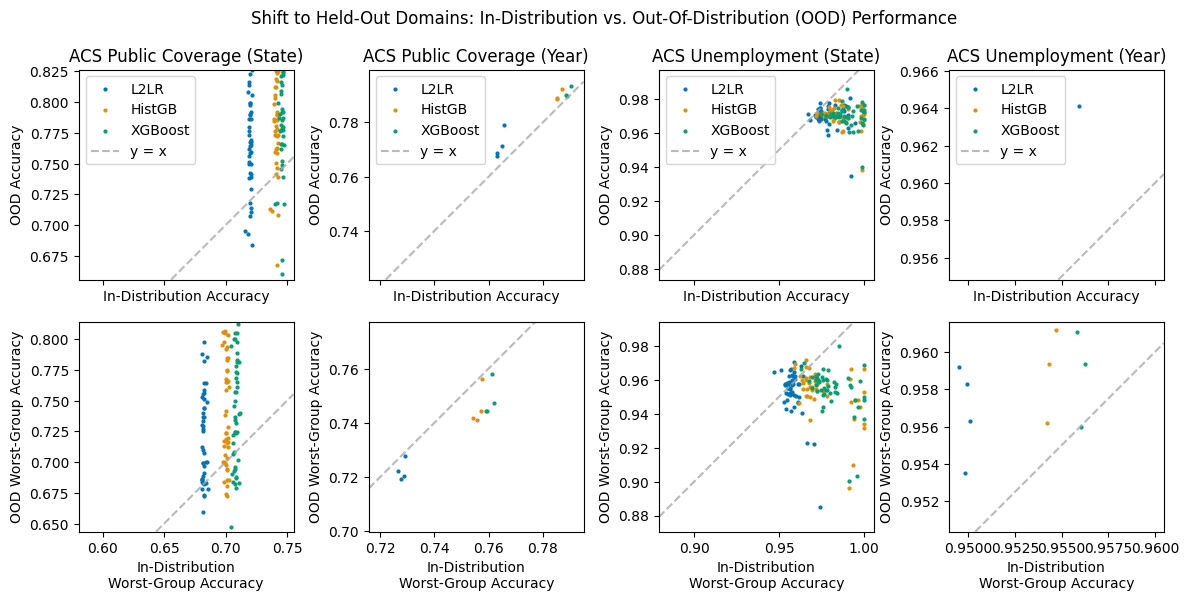

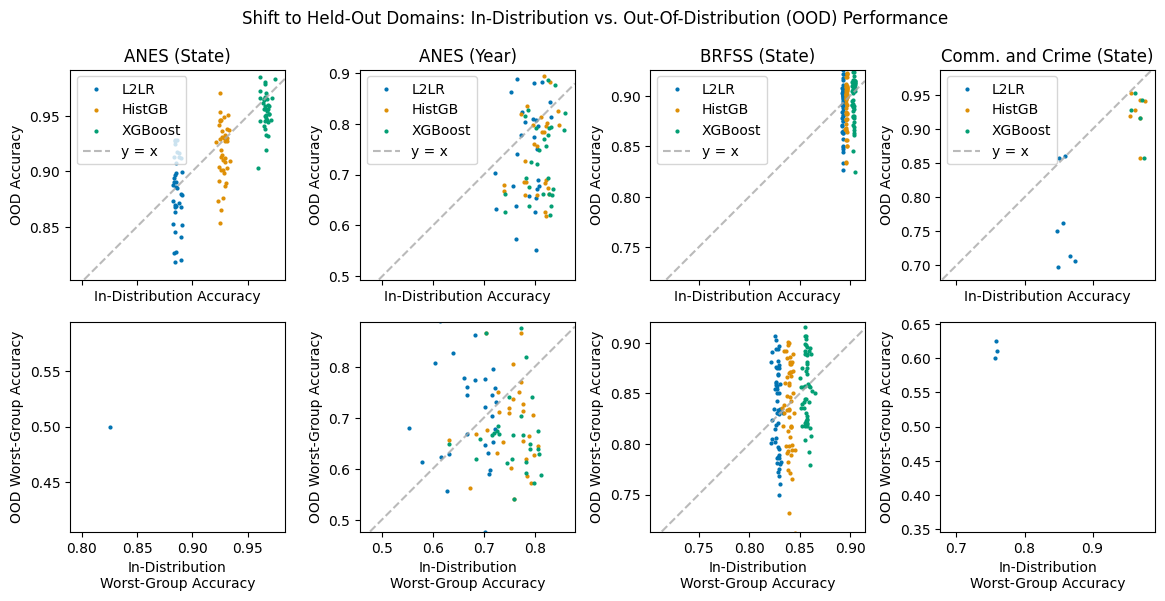

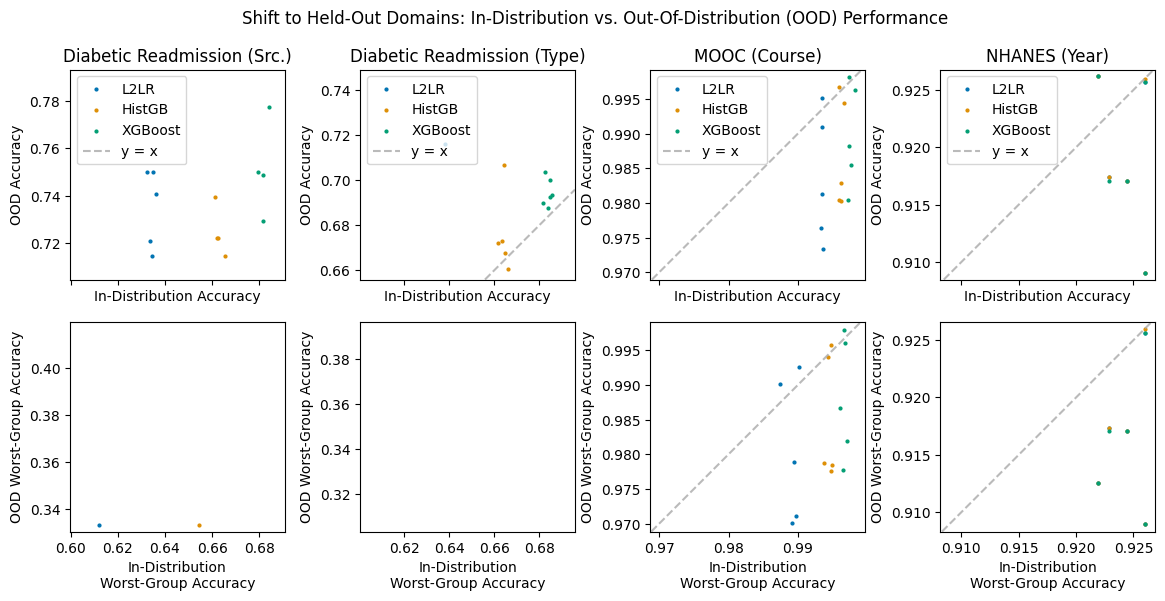

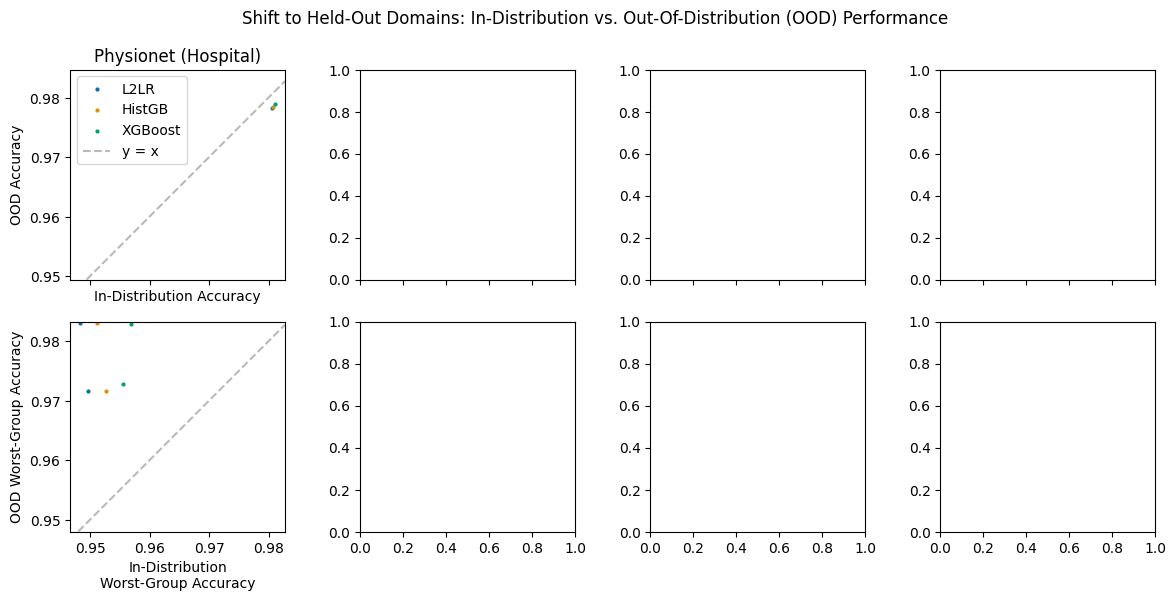

In [13]:
rgb_values = sns.color_palette("colorblind", 8)
n_datasets = len(df['dataset'].unique())


CHUNK_SIZE = 4 # max number of datasets in a subplot
POINT_SIZE=4.

for chunk in chunker(CHUNK_SIZE, df['dataset'].unique()):
    fig, axs = plt.subplots(nrows=2, ncols=CHUNK_SIZE, sharex='col', figsize=(3.5*CHUNK_SIZE,6))
    for i,dataset in enumerate(chunk):
        for col,est in zip(rgb_values, df['estimator'].unique()):
            df_ = df.query(f"estimator == '{est}' and dataset == '{dataset}'")
            axs[0, i].set_title(dataset)
            axs[0, i].scatter(df_['accuracy_id_test'], 
                              df_['accuracy_ood_test'], color=col, label=est, s=POINT_SIZE)
            axs[1, i].scatter(df_['accuracy_worstgroup_id_test'], 
                              df_['accuracy_worstgroup_ood_test'], color=col, label=est, s=POINT_SIZE)

        axs[0, i].set_xlabel("In-Distribution Accuracy")
        axs[0, i].set_ylabel("OOD Accuracy") 

        axs[1, i].set_xlabel("In-Distribution\nWorst-Group Accuracy")
        axs[1, i].set_ylabel("OOD Worst-Group Accuracy") 

        xmin = df.query(f"dataset == '{dataset}'")[['accuracy_id_test', 'accuracy_worstgroup_id_test']].values.min()
        xmax = df.query(f"dataset == '{dataset}'")[['accuracy_id_test', 'accuracy_worstgroup_id_test']].values.max()
        xrange = xmax - xmin

        ymin = df.query(f"dataset == '{dataset}'")[['accuracy_ood_test', 'accuracy_worstgroup_ood_test']].values.min()
        ymax = df.query(f"dataset == '{dataset}'")[['accuracy_ood_test', 'accuracy_worstgroup_ood_test']].values.max()
        yrange = ymax - ymin

        xymin = min(xmin, ymin)

        print(f"dataset is {dataset}, xymin is {xymin}")
        axs[0, i].axline((xymin, xymin), 
                         slope=1, color="darkgrey", ls="--", alpha=0.8, label="y = x") 

        axs[1, i].axline((xymin, xymin),  
                         slope=1, color="darkgrey", ls="--", alpha=0.8, label="y = x")

        axs[0,i].legend(loc="upper left")

        for row in range(axs.shape[0]):
            axs[row, i].axis('equal')
    fig.subplots_adjust(wspace=0.35)
    _ = plt.suptitle("Shift to Held-Out Domains: In-Distribution vs. Out-Of-Distribution (OOD) Performance")

dataset is ACS Food Stamps (State), xymin is 0.5953878406708596
dataset is ACS Food Stamps (Year), xymin is 0.751875699888018
dataset is ACS Income (State), xymin is 0.696584058941728
dataset is ACS Income (Year), xymin is 0.7815475590203635
dataset is ACS Public Coverage (State), xymin is 0.588495575221239
dataset is ACS Public Coverage (Year), xymin is 0.7194728647686833
dataset is ACS Unemployment (State), xymin is 0.8849162011173184
dataset is ACS Unemployment (Year), xymin is 0.9494962015901968
dataset is ANES (State), xymin is 0.7982832618025751
dataset is ANES (Year), xymin is 0.4761904761904761
dataset is BRFSS (State), xymin is 0.7115384615384616
dataset is Comm. and Crime (State), xymin is 0.6904761904761905
dataset is Diabetic Readmission (Src.), xymin is 0.6038602941176471
dataset is Diabetic Readmission (Type), xymin is 0.6048550236008091
dataset is MOOC (Course), xymin is 0.9700896231508476
dataset is NHANES (Year), xymin is 0.9090084643288996
dataset is Physionet (Hospit

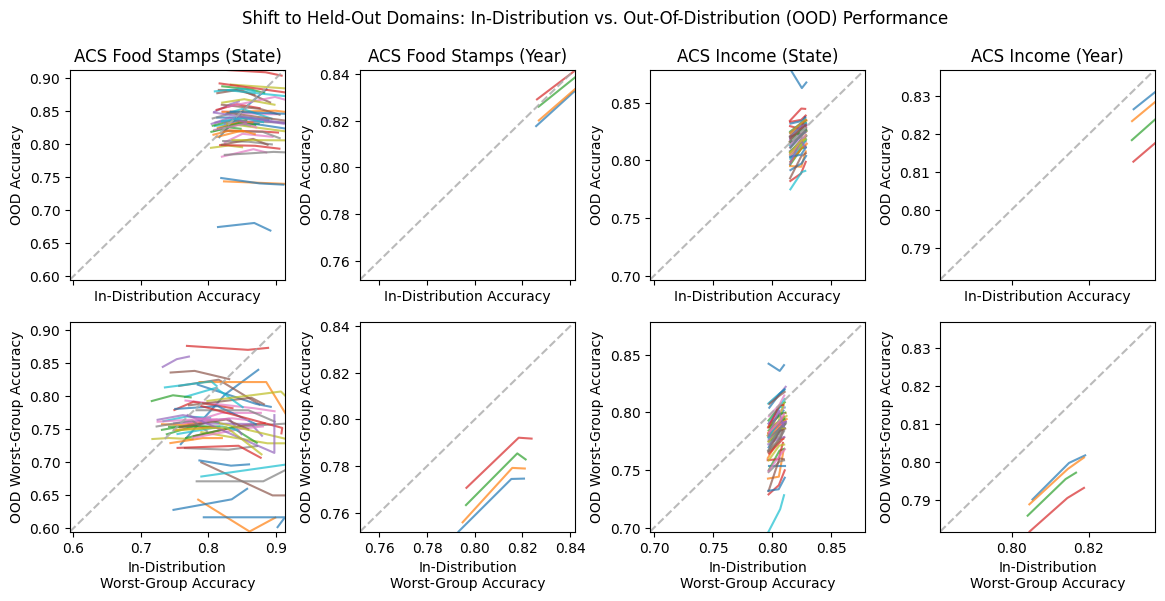

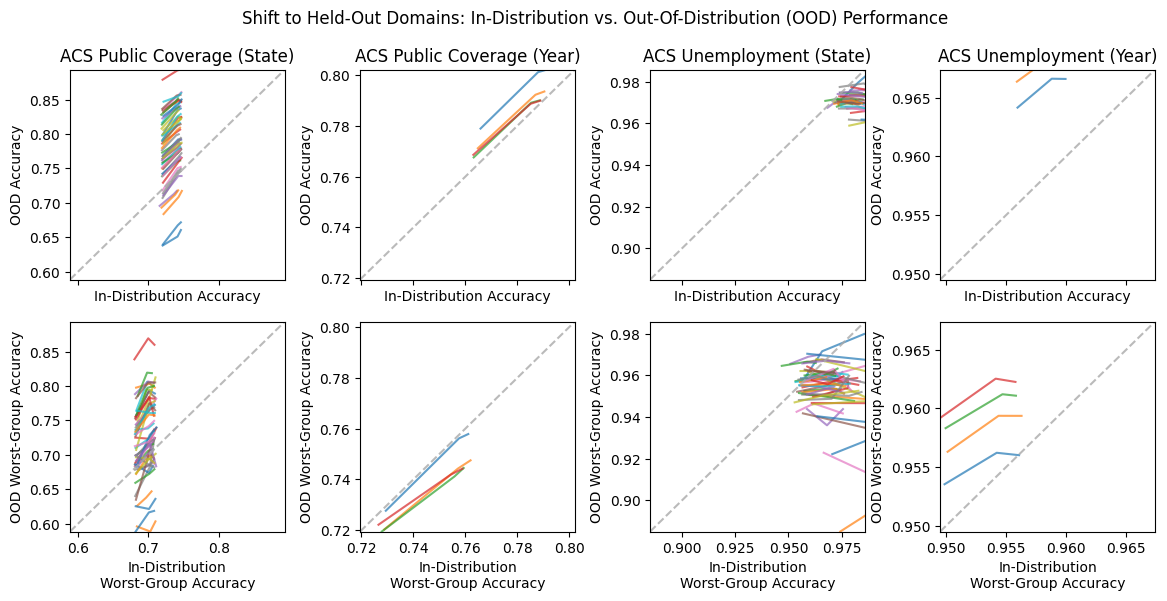

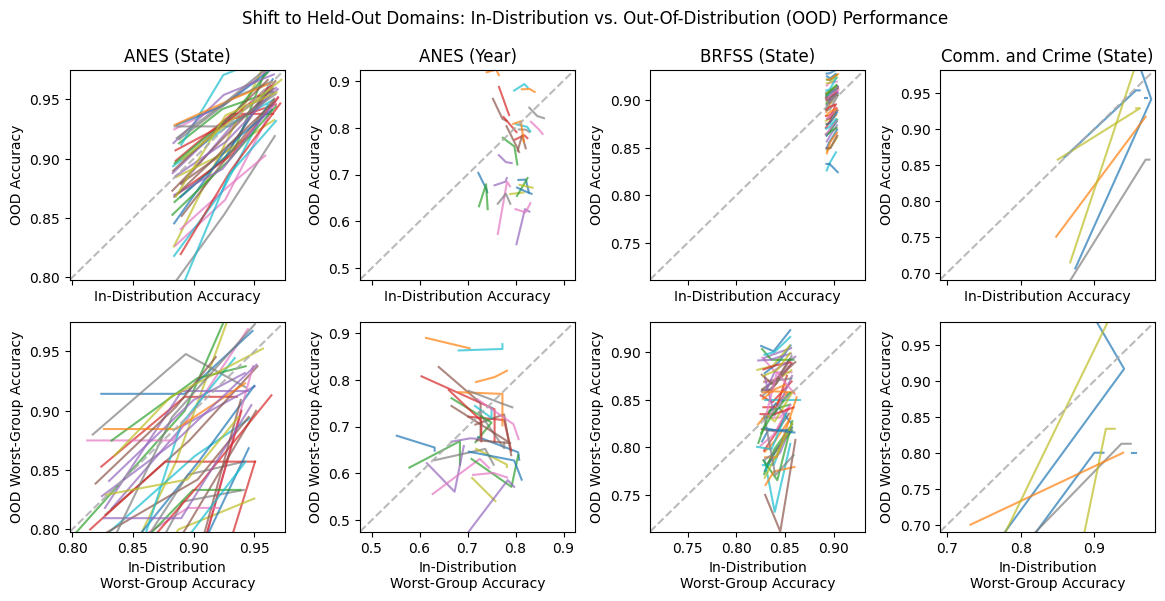

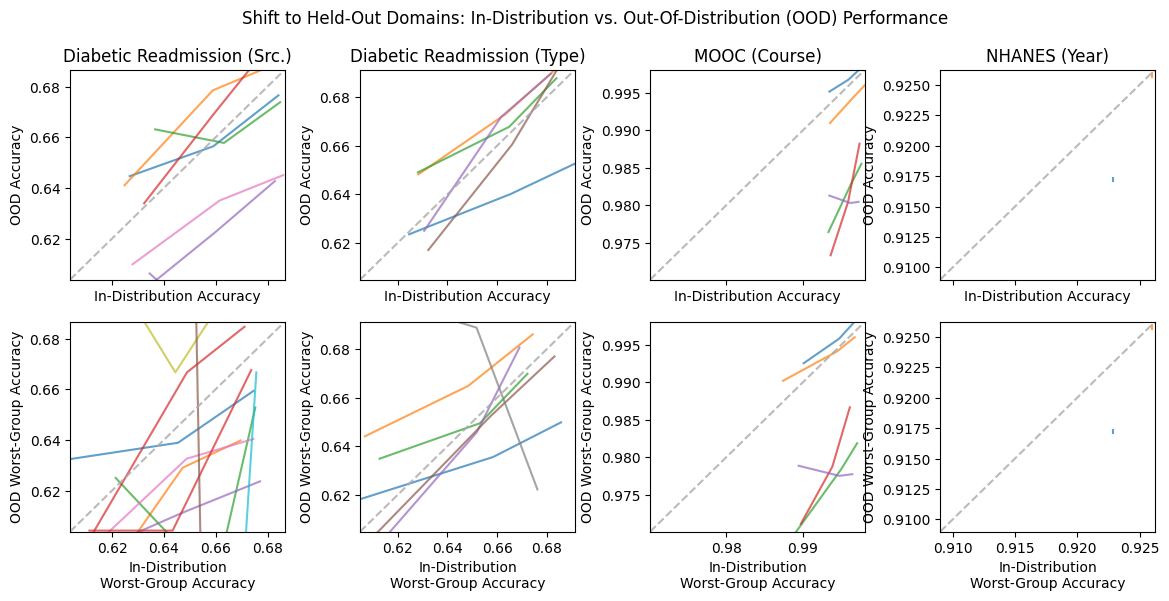

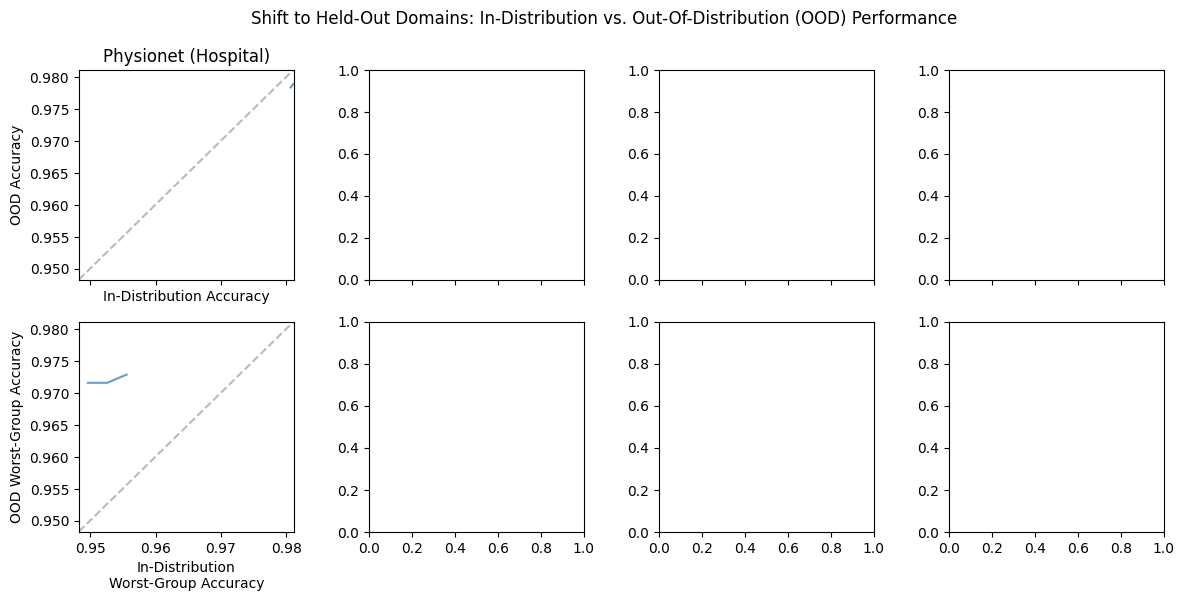

In [14]:
rgb_values = sns.color_palette("colorblind", 8)

for chunk in chunker(CHUNK_SIZE, df['dataset'].unique()):
    fig, axs = plt.subplots(nrows=2, ncols=CHUNK_SIZE, sharex='col', figsize=(3.5*CHUNK_SIZE,6))
    for i,dataset in enumerate(chunk):

        ood_splits = df.query(f"dataset == '{dataset}'")['domain_split_ood_values'].unique()

        for state in ood_splits:
            df_ = df[(df["dataset"] == dataset) & (df["domain_split_ood_values"] == state)]
            axs[0, i].set_title(dataset)
            axs[0, i].plot(df_['accuracy_id_test'], df_['accuracy_ood_test'], alpha=0.7)
            axs[1, i].plot(df_['accuracy_worstgroup_id_test'], df_['accuracy_worstgroup_ood_test'], alpha=0.7)

        axs[0, i].set_xlabel("In-Distribution Accuracy")
        axs[0, i].set_ylabel("OOD Accuracy") 

        axs[1, i].set_xlabel("In-Distribution\nWorst-Group Accuracy")
        axs[1, i].set_ylabel("OOD Worst-Group Accuracy") 

        xmin = df.query(f"dataset == '{dataset}'")[['accuracy_id_test', 'accuracy_worstgroup_id_test']].values.min()
        xmax = df.query(f"dataset == '{dataset}'")[['accuracy_id_test', 'accuracy_worstgroup_id_test']].values.max()
        xrange = xmax - xmin

        ymin = df.query(f"dataset == '{dataset}'")[['accuracy_ood_test', 'accuracy_worstgroup_ood_test']].values.min()
        ymax = df.query(f"dataset == '{dataset}'")[['accuracy_ood_test', 'accuracy_worstgroup_ood_test']].values.max()
        yrange = ymax - ymin

        xymin = min(xmin, ymin)

        print(f"dataset is {dataset}, xymin is {xymin}")
        axs[0, i].axline((xymin, xymin), 
                         slope=1, color="darkgrey", ls="--", alpha=0.8, label="y = x") 

        axs[1, i].axline((xymin, xymin), slope=1, color="darkgrey", ls="--", alpha=0.8, label="y = x")

        axrange = max(xrange, yrange)

        for row in range(axs.shape[0]):
            axs[row,i].set(xlim=(xymin, xymin + axrange),
                         ylim=(xymin, xymin + axrange))
    fig.subplots_adjust(wspace=0.35)
    _ = plt.suptitle("Shift to Held-Out Domains: In-Distribution vs. Out-Of-Distribution (OOD) Performance")